## 6. VAR Modeling

This script covers the VAR modelind and Granger causality analysis to understand the drives factors for cryptocurrency price movements

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import acf, grangercausalitytests, pacf
import utils

In [2]:
summarised_all = pd.read_csv('input_model_file.csv')
summarised_all=summarised_all.drop(columns='Unnamed: 0')
summarised_all.head()

,Date,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,uniq_tweet_vol,avg_tweet_len,...,Negative_share,Open_prices,High_prices,Low_prices,Close_prices,Volume_BTC,polarity,pct_change,direction,Close
0,2021-07-01,0.021007,0.877197,0.101582,0.220600,2096.803213,1.747746,121675,54104,122.808901,...,0.075546,34595.875,34773.445,32711.785,33248.825,1.784648e+08,0.046195,NaN,NaN,63.50
1,2021-07-02,0.016984,0.889221,0.093512,0.210509,2542.598358,1.644665,109249,45549,124.999753,...,0.067506,33235.275,33953.980,32700.025,33676.020,1.148738e+08,0.039852,0.012848,1.0,63.51
2,2021-07-03,0.015089,0.886210,0.098290,0.215499,5788.559491,1.976620,126263,44563,122.904485,...,0.066385,33675.470,34951.140,33399.860,34679.150,6.563334e+07,0.038510,0.029788,1.0,63.51
3,2021-07-04,0.014355,0.873028,0.112238,0.257782,3349.956329,1.801355,108334,40391,122.499575,...,0.060230,34671.040,35972.855,34307.790,34825.025,7.937801e+07,0.040139,0.004206,1.0,63.51
4,2021-07-05,0.016379,0.870216,0.112665,0.259466,2227.247343,1.701465,120897,50291,124.201949,...,0.070754,34807.920,34909.210,33121.500,33823.215,1.209090e+08,0.042958,-0.028767,0.0,63.51


In [3]:
summarised_all.columns

Index(['Date', 'avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr', 'avg_cmp_scr',
       'avg_retweet_cnt', 'avg_like_cnt', 'tweet_vol', 'uniq_tweet_vol',
       'avg_tweet_len', 'avg_followers_cnt', 'negative', 'neutral', 'positive',
       'Bullish_Ratio', 'Negative_share', 'Open_prices', 'High_prices',
       'Low_prices', 'Close_prices', 'Volume_BTC', 'polarity', 'pct_change',
       'direction', 'Close'],
      dtype='object')

In [4]:
df_var = summarised_all[['Date', 'avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr',
       'avg_cmp_scr', 'avg_retweet_cnt', 'avg_like_cnt', 'tweet_vol',
       'avg_tweet_len', 'avg_followers_cnt',  'Bullish_Ratio',
       'Negative_share', 'Open_prices', 'High_prices',
       'Low_prices', 'Close_prices', 'Volume_BTC', 'polarity', 
       'pct_change', 'Close']]
df_var['Date']=pd.to_datetime(df_var['Date'])

<ipython-input-4-065fe7219298>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['Date']=pd.to_datetime(df_var['Date'])


In [5]:
df_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               46 non-null     datetime64[ns]
 1   avg_neg_scr        46 non-null     float64       
 2   avg_neu_scr        46 non-null     float64       
 3   avg_pos_scr        46 non-null     float64       
 4   avg_cmp_scr        46 non-null     float64       
 5   avg_retweet_cnt    46 non-null     float64       
 6   avg_like_cnt       46 non-null     float64       
 7   tweet_vol          46 non-null     int64         
 8   avg_tweet_len      46 non-null     float64       
 9   avg_followers_cnt  46 non-null     float64       
 10  Bullish_Ratio      46 non-null     float64       
 11  Negative_share     46 non-null     float64       
 12  Open_prices        46 non-null     float64       
 13  High_prices        46 non-null     float64       
 14  Low_prices  

In [6]:
df_var = df_var.fillna(0)
df_var.head()

,Date,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,avg_tweet_len,avg_followers_cnt,Bullish_Ratio,Negative_share,Open_prices,High_prices,Low_prices,Close_prices,Volume_BTC,polarity,pct_change,Close
0,2021-07-01,0.021007,0.877197,0.101582,0.220600,2096.803213,1.747746,121675,122.808901,2179.789094,5.681680,0.075546,34595.875,34773.445,32711.785,33248.825,1.784648e+08,0.046195,0.000000,63.50
1,2021-07-02,0.016984,0.889221,0.093512,0.210509,2542.598358,1.644665,109249,124.999753,2010.086582,6.312678,0.067506,33235.275,33953.980,32700.025,33676.020,1.148738e+08,0.039852,0.012848,63.51
2,2021-07-03,0.015089,0.886210,0.098290,0.215499,5788.559491,1.976620,126263,122.904485,1688.782803,6.590790,0.066385,33675.470,34951.140,33399.860,34679.150,6.563334e+07,0.038510,0.029788,63.51
3,2021-07-04,0.014355,0.873028,0.112238,0.257782,3349.956329,1.801355,108334,122.499575,1777.710857,8.440000,0.060230,34671.040,35972.855,34307.790,34825.025,7.937801e+07,0.040139,0.004206,63.51
4,2021-07-05,0.016379,0.870216,0.112665,0.259466,2227.247343,1.701465,120897,124.201949,1873.034095,7.088964,0.070754,34807.920,34909.210,33121.500,33823.215,1.209090e+08,0.042958,-0.028767,63.51


### Essential Functions for running the tests

#### Descriptive statistics

In [7]:
def descriptive_statistics(df, series):
    stats = df[series].describe()    
    print('\nDescriptive Statistics for', '\'' + series + '\'', '\n\n', stats)

In [8]:
def get_graphics(df, series, xlabel, ylabel, title, grid = True):
    plt.plot(pd.to_datetime(df.index), df[series])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(grid)
    return plt.show()

#### Stationary tests

For modeling the multivariate time series, unit root test is performed to identify non-stationary variables and take differences of the evolving variables to reduce the bias induced by these variables. If there is a bias, t-statistics tests in the model won’t be reliable. Both Augmented Dicker-Fuller (ADF) and KPSS tests are performed to check for stationarity of the series

unit root = statistical properties of series are not constant with time.

In order to be stationary, series has to be constant with time. So if a series has a unit root, it is not stationary

strict stationary = mean, variance, covariance are not function of time
trend stationary = no root unit, but has a trend. if you remove the trend, it would be strict stationary
difference stationary = series can be made strict stationary by differencing

**1.ADF Augmented Dickey Fuller Test (unit root test)**

According to the ADF test, null hypothesis is that the series has a unit root and alternate hypothesis states that the series has no unit root. 

We accept the null hypothesis when t-score is greater than the critical value which means there is a unit root and series is non stationary. Otherwise we reject the null which means the series is stationary

adf can be interpreted as a difference stationary test

In [9]:
# ADF Augmented Dickey Fuller Test
def adf_test(df, series):
    results = adfuller(df[series])
    output = pd.Series(results[0:4], index = ['t-score', 'p-value', '# of lags used', '# of observations'])
    for key, value in results[4].items():
        output['critical value (%s)' %key] = value
    # if t-score < critical value at 5%, the data is stationary
    # if t-score > critical value at 5%, the data is NOT stationary
    if output[0] < output[5]:
        print('\nADF: The data', '\'' + series + '\'', 'is STATIONARY \n\n', output)
    elif output[0] > output[5]:
        print('\nADF: The data', '\'' + series + '\'', 'is NOT STATIONARY \n\n', output)
    else:
        print('\nADF: There is something wrong with', '\'' + series + '\'','\n\n', output)

#### KPSS Kwiatkowski-Phillips-Schmidt-Shin Test (stationary test)

Here the null hypothesis is opposite and it states that the series has a stationary trend and alternate hypothesis is that the series has a unit root and is non-stationary

So, we accept null hypothesis when t-score is less than critical value (series is stationary)
We reject null when t-score is greater than the critical value (series is not stationary

kpss classifies a series as stationary on the absence of a unit root
(both strict stationary and trend stationary will be classified as stationary)

In [10]:
# KPSS Kwiatkowski-Phillips-Schmidt-Shin Test (stationary test)
def kpss_test(df, series):
    results = kpss(df[series], regression = 'ct')
    output = pd.Series(results[0:3], index = ['t-score', 'p-value', '# lags used'])              
    for key, value in results[3].items():
        output['critical value (%s)' %key] = value
    # if t-score < critical value at 5%, the data is stationary
    # if t-score > critical value at 5%, the data is NOT stationary
    if output[0] < output[4]:
        print('\nKPSS: The data', '\'' + series + '\'', 'is STATIONARY \n\n', output)
    elif output[0] > output[4]:
        print('\nKPSS: The data', '\'' + series + '\'', 'is NOT STATIONARY \n\n', output)
    else:
        print('\nKPSS: There is something wrong with', '\'' + series + '\'', '\n\n', output)

In [11]:
def series_analysis(df, series, xlabel, ylabel, title, grid = True):
    # descriptive stats
    descriptive_statistics(df, series)
    # graphics
    get_graphics(df, series, xlabel, ylabel, title, grid = True)
    # stationary tests
    adf_test(df, series)
    kpss_test(df, series)

In [12]:
###transforming variables
stationary = pd.DataFrame()

### Running test for variables

In [13]:
df_var =  df_var.drop_duplicates(subset=['Date'])

df_var=df_var[df_var['Date']>='2021-07-01'].set_index('Date')
df_var.shape

(46, 19)

In [14]:
df_var

,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,avg_tweet_len,avg_followers_cnt,Bullish_Ratio,Negative_share,Open_prices,High_prices,Low_prices,Close_prices,Volume_BTC,polarity,pct_change,Close
Date,,,,,,,,,,,,,,,,,,,
2021-07-01,0.021007,0.877197,0.101582,0.220600,2096.803213,1.747746,121675,122.808901,2179.789094,5.681680,0.075546,34595.875,34773.445,32711.785,33248.825,1.784648e+08,0.046195,0.000000,63.50
2021-07-02,0.016984,0.889221,0.093512,0.210509,2542.598358,1.644665,109249,124.999753,2010.086582,6.312678,0.067506,33235.275,33953.980,32700.025,33676.020,1.148738e+08,0.039852,0.012848,63.51
2021-07-03,0.015089,0.886210,0.098290,0.215499,5788.559491,1.976620,126263,122.904485,1688.782803,6.590790,0.066385,33675.470,34951.140,33399.860,34679.150,6.563334e+07,0.038510,0.029788,63.51
2021-07-04,0.014355,0.873028,0.112238,0.257782,3349.956329,1.801355,108334,122.499575,1777.710857,8.440000,0.060230,34671.040,35972.855,34307.790,34825.025,7.937801e+07,0.040139,0.004206,63.51
2021-07-05,0.016379,0.870216,0.112665,0.259466,2227.247343,1.701465,120897,124.201949,1873.034095,7.088964,0.070754,34807.920,34909.210,33121.500,33823.215,1.209090e+08,0.042958,-0.028767,63.51
2021-07-06,0.018260,0.865466,0.115642,0.270794,2098.188073,1.974374,123314,122.262249,2019.831811,6.088081,0.088384,33836.490,35107.405,33520.490,34354.720,1.520159e+08,0.045953,0.015714,61.93
2021-07-07,0.014177,0.893831,0.091727,0.208712,2605.157232,1.723612,110175,123.508963,1977.476206,6.954424,0.061339,34348.650,35078.650,33447.320,33609.735,1.017113e+08,0.036062,-0.021685,62.25
2021-07-08,0.021336,0.851658,0.126767,0.255305,3381.657614,1.382797,136793,124.249413,1895.574642,4.909468,0.103843,33597.665,33718.130,32101.000,32926.770,1.649010e+08,0.052006,-0.020320,61.41
2021-07-09,0.020115,0.858623,0.120932,0.247437,2475.088183,1.930582,115056,125.005406,2446.118968,5.363312,0.092677,32923.845,34188.985,32455.735,33813.120,9.839532e+07,0.049321,0.026919,63.08


In [15]:
df_var['pct_change'] = df_var['pct_change']+1

In [16]:
df_var.columns

Index(['avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr', 'avg_cmp_scr',
       'avg_retweet_cnt', 'avg_like_cnt', 'tweet_vol', 'avg_tweet_len',
       'avg_followers_cnt', 'Bullish_Ratio', 'Negative_share', 'Open_prices',
       'High_prices', 'Low_prices', 'Close_prices', 'Volume_BTC', 'polarity',
       'pct_change', 'Close'],
      dtype='object')

In [17]:
df_var_log=pd.DataFrame()

#### take log transformations of the series 


Descriptive Statistics for 'avg_neg_scr' 

 count    46.000000
mean     -3.992340
std       0.191511
min      -4.303046
25%      -4.106253
50%      -4.009821
75%      -3.888456
max      -3.343755
Name: avg_neg_scr, dtype: float64


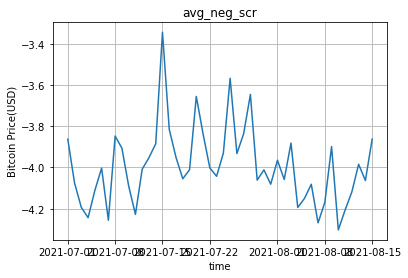


ADF: The data 'avg_neg_scr' is STATIONARY 

 t-score                 -4.662385
p-value                  0.000099
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'avg_neg_scr' is STATIONARY 

 t-score                   0.123824
p-value                   0.091067
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_neu_scr' 

 count    46.000000
mean     -0.141028
std       0.018670
min      -0.200568
25%      -0.152390
50%      -0.141466
75%      -0.130523
max      -0.096658
Name: avg_neu_scr, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


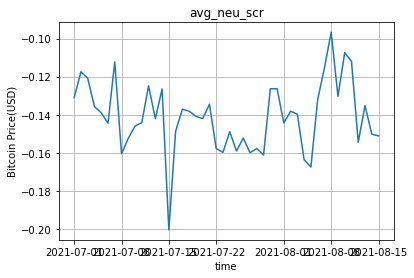


ADF: The data 'avg_neu_scr' is STATIONARY 

 t-score                 -4.888809
p-value                  0.000037
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'avg_neu_scr' is STATIONARY 

 t-score                   0.135552
p-value                   0.069347
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_pos_scr' 

 count    46.000000
mean     -2.195977
std       0.131505
min      -2.591380
25%      -2.286707
50%      -2.182380
75%      -2.115117
max      -1.922105
Name: avg_pos_scr, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


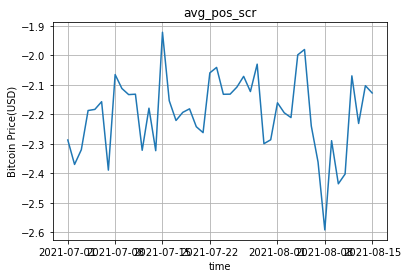


ADF: The data 'avg_pos_scr' is STATIONARY 

 t-score                 -4.858092
p-value                  0.000042
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'avg_pos_scr' is STATIONARY 

 t-score                   0.132397
p-value                   0.075190
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_cmp_scr' 

 count    46.000000
mean     -1.451690
std       0.136150
min      -1.913080
25%      -1.533241
50%      -1.436273
75%      -1.358055
max      -1.159494
Name: avg_cmp_scr, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


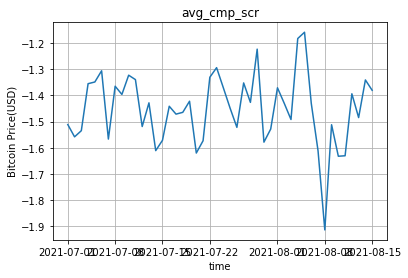

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'avg_cmp_scr' is STATIONARY 

 t-score                 -4.782682
p-value                  0.000059
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'avg_cmp_scr' is STATIONARY 

 t-score                   0.098675
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_retweet_cnt' 

 count    46.000000
mean      7.702777
std       0.351332
min       6.896617
25%       7.531369
50%       7.712191
75%       7.881334
max       8.663639
Name: avg_retweet_cnt, dtype: float64


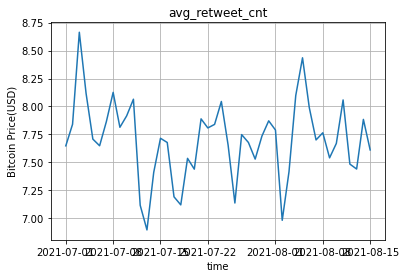

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'avg_retweet_cnt' is STATIONARY 

 t-score                 -5.081185
p-value                  0.000015
# of lags used           1.000000
# of observations       44.000000
critical value (1%)     -3.588573
critical value (5%)     -2.929886
critical value (10%)    -2.603185
dtype: float64

KPSS: The data 'avg_retweet_cnt' is STATIONARY 

 t-score                   0.114282
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_like_cnt' 

 count    46.000000
mean      0.828640
std       0.256556
min       0.324109
25%       0.680536
50%       0.811571
75%       0.973334
max       1.492393
Name: avg_like_cnt, dtype: float64


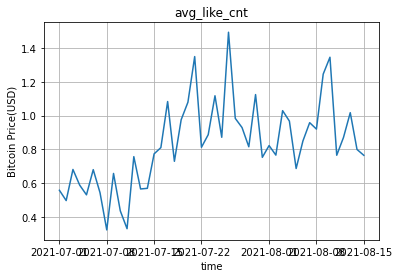

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'avg_like_cnt' is STATIONARY 

 t-score                 -3.894667
p-value                  0.002074
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'avg_like_cnt' is STATIONARY 

 t-score                   0.121599
p-value                   0.095187
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'tweet_vol' 

 count    46.000000
mean     12.330045
std       0.491751
min      11.525921
25%      11.728397
50%      12.516116
75%      12.704201
max      13.148723
Name: tweet_vol, dtype: float64


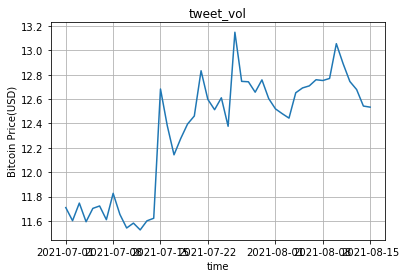

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'tweet_vol' is NOT STATIONARY 

 t-score                 -1.653115
p-value                  0.455417
# of lags used           1.000000
# of observations       44.000000
critical value (1%)     -3.588573
critical value (5%)     -2.929886
critical value (10%)    -2.603185
dtype: float64

KPSS: The data 'tweet_vol' is STATIONARY 

 t-score                   0.126321
p-value                   0.086442
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_tweet_len' 

 count    46.000000
mean      4.744895
std       0.082164
min       4.472236
25%       4.727214
50%       4.773777
75%       4.789878
max       4.829847
Name: avg_tweet_len, dtype: float64


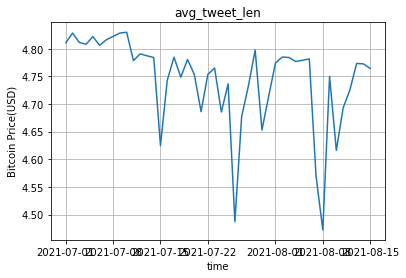

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'avg_tweet_len' is STATIONARY 

 t-score                 -4.318965
p-value                  0.000412
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'avg_tweet_len' is NOT STATIONARY 

 t-score                   0.152014
p-value                   0.044989
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_followers_cnt' 

 count    46.000000
mean      7.917889
std       0.250849
min       7.431763
25%       7.705167
50%       7.968674
75%       8.106432
max       8.429469
Name: avg_followers_cnt, dtype: float64


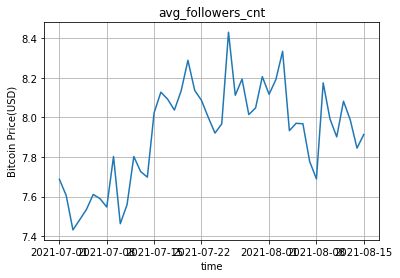


ADF: The data 'avg_followers_cnt' is NOT STATIONARY 

 t-score                 -2.632021
p-value                  0.086558
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'avg_followers_cnt' is STATIONARY 

 t-score                   0.140873
p-value                   0.059494
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Bullish_Ratio' 

 count    46.000000
mean      1.773595
std       0.235213
min       0.875426
25%       1.685382
50%       1.803449
75%       1.904715
max       2.165683
Name: Bullish_Ratio, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


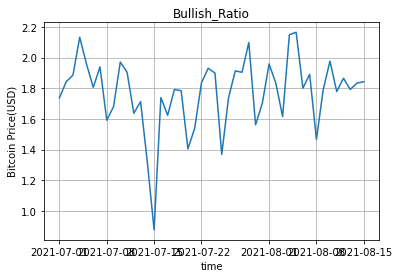

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Bullish_Ratio' is STATIONARY 

 t-score                 -4.898163
p-value                  0.000035
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'Bullish_Ratio' is STATIONARY 

 t-score                   0.104889
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Negative_share' 

 count    46.000000
mean     -2.548328
std       0.222686
min      -2.962195
25%      -2.660407
50%      -2.595352
75%      -2.427950
max      -1.643358
Name: Negative_share, dtype: float64


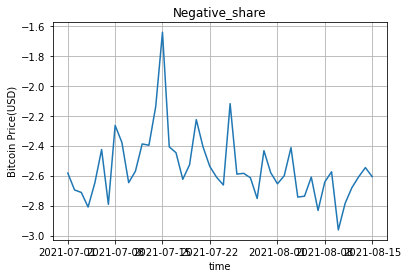

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'Negative_share' is STATIONARY 

 t-score                 -4.483025
p-value                  0.000211
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'Negative_share' is STATIONARY 

 t-score                   0.119951
p-value                   0.098239
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Open_prices' 

 count    46.000000
mean     10.512753
std       0.135432
min      10.303049
25%      10.408068
50%      10.452575
75%      10.607376
max      10.772966
Name: Open_prices, dtype: float64


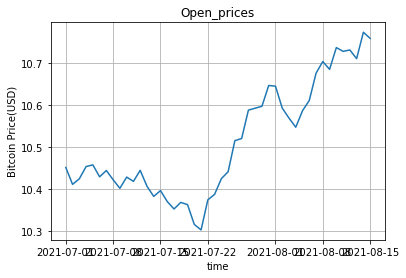

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'Open_prices' is NOT STATIONARY 

 t-score                  0.170680
p-value                  0.970568
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'Open_prices' is STATIONARY 

 t-score                   0.135960
p-value                   0.068592
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'High_prices' 

 count    46.000000
mean     10.543074
std       0.138024
min      10.326700
25%      10.428066
50%      10.478344
75%      10.656580
max      10.782819
Name: High_prices, dtype: float64


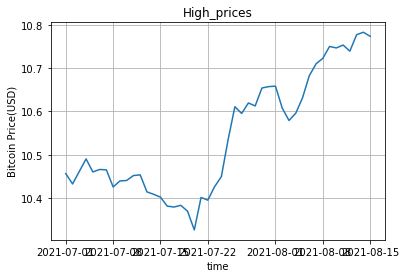


ADF: The data 'High_prices' is NOT STATIONARY 

 t-score                  0.105788
p-value                  0.966454
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'High_prices' is STATIONARY 

 t-score                   0.13014
p-value                   0.07937
# lags used              10.00000
critical value (10%)      0.11900
critical value (5%)       0.14600
critical value (2.5%)     0.17600
critical value (1%)       0.21600
dtype: float64

Descriptive Statistics for 'Low_prices' 

 count    46.000000
mean     10.486688
std       0.134280
min      10.285014
25%      10.379390
50%      10.425307
75%      10.579569
max      10.736895
Name: Low_prices, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


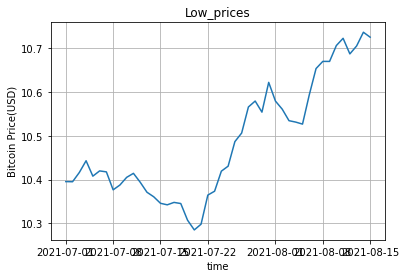

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'Low_prices' is NOT STATIONARY 

 t-score                  0.173312
p-value                  0.970724
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'Low_prices' is STATIONARY 

 t-score                   0.136379
p-value                   0.067817
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Close_prices' 

 count    46.000000
mean     10.519559
std       0.139997
min      10.302942
25%      10.408322
50%      10.455993
75%      10.636346
max      10.773024
Name: Close_prices, dtype: float64


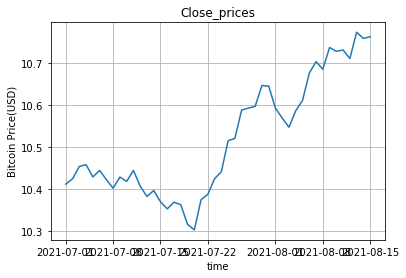


ADF: The data 'Close_prices' is NOT STATIONARY 

 t-score                  0.046513
p-value                  0.962214
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'Close_prices' is STATIONARY 

 t-score                   0.132010
p-value                   0.075907
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Volume_BTC' 

 count    46.000000
mean     18.858015
std       0.531729
min      17.875987
25%      18.453409
50%      18.818311
75%      19.218401
max      20.059105
Name: Volume_BTC, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


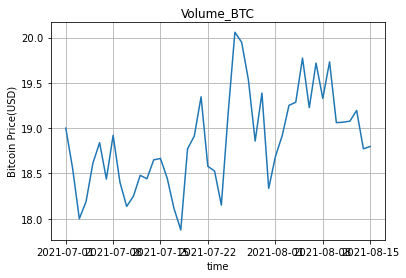

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Volume_BTC' is NOT STATIONARY 

 t-score                 -2.043999
p-value                  0.267620
# of lags used           3.000000
# of observations       42.000000
critical value (1%)     -3.596636
critical value (5%)     -2.933297
critical value (10%)    -2.604991
dtype: float64

KPSS: The data 'Volume_BTC' is STATIONARY 

 t-score                   0.105596
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'polarity' 

 count    46.000000
mean     -3.094158
std       0.135497
min      -3.380594
25%      -3.159247
50%      -3.090056
75%      -3.033901
max      -2.632930
Name: polarity, dtype: float64


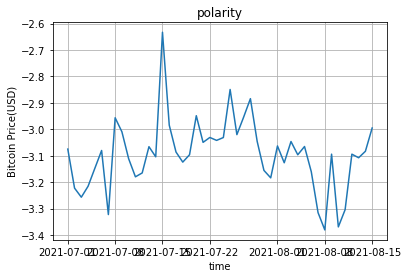

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'polarity' is STATIONARY 

 t-score                 -4.414915
p-value                  0.000279
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'polarity' is STATIONARY 

 t-score                   0.129168
p-value                   0.081170
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'pct_change' 

 count    46.000000
mean      0.007624
std       0.031884
min      -0.052588
25%      -0.017983
50%       0.004276
75%       0.026456
max       0.073812
Name: pct_change, dtype: float64


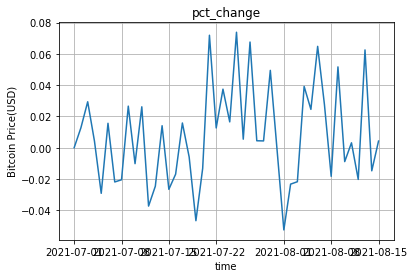


ADF: The data 'pct_change' is STATIONARY 

 t-score                -6.422173e+00
p-value                 1.780383e-08
# of lags used          0.000000e+00
# of observations       4.500000e+01
critical value (1%)    -3.584829e+00
critical value (5%)    -2.928299e+00
critical value (10%)   -2.602344e+00
dtype: float64

KPSS: The data 'pct_change' is STATIONARY 

 t-score                   0.095404
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Close' 

 count    46.000000
mean      4.126189
std       0.024106
min       4.056816
25%       4.111774
50%       4.128504
75%       4.144879
max       4.162626
Name: Close, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


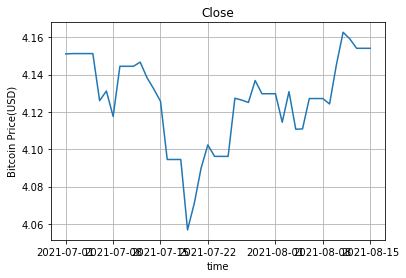


ADF: The data 'Close' is NOT STATIONARY 

 t-score                 -1.874016
p-value                  0.344382
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'Close' is STATIONARY 

 t-score                   0.142556
p-value                   0.056377
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,avg_tweet_len,avg_followers_cnt,Bullish_Ratio,Negative_share,Open_prices,High_prices,Low_prices,Close_prices,Volume_BTC,polarity,pct_change,Close
Date,,,,,,,,,,,,,,,,,,,
2021-07-01,-3.862885,-0.131024,-2.286889,-1.511405,7.648169,0.558327,11.709109,4.810629,7.686983,1.737247,-2.583020,10.451490,10.456609,10.395491,10.411775,18.999902,-3.074887,0.000000,4.151040
2021-07-02,-4.075480,-0.117410,-2.369669,-1.558229,7.840942,0.497537,11.601385,4.828312,7.605933,1.842560,-2.695534,10.411367,10.432761,10.395131,10.424541,18.559345,-3.222575,0.012767,4.151197
2021-07-03,-4.193813,-0.120801,-2.319836,-1.534800,8.663639,0.681388,11.746122,4.811408,7.431763,1.885673,-2.712280,10.424525,10.461706,10.416307,10.453894,17.999594,-3.256825,0.029353,4.151197
2021-07-04,-4.243691,-0.135788,-2.187132,-1.355641,8.116703,0.588539,11.592974,4.808108,7.483082,2.132982,-2.809578,10.453660,10.490520,10.443128,10.458092,18.189732,-3.215412,0.004198,4.151197
2021-07-05,-4.111750,-0.139014,-2.183335,-1.349128,7.708522,0.531490,11.702694,4.821909,7.535315,1.958539,-2.648540,10.457600,10.460506,10.407938,10.428903,18.610549,-3.147543,-0.029189,4.151197


In [18]:
col_list=[ 
       'avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr', 'avg_cmp_scr',
       'avg_retweet_cnt', 'avg_like_cnt', 'tweet_vol', 'avg_tweet_len',
       'avg_followers_cnt', 'Bullish_Ratio', 'Negative_share', 'Open_prices',
       'High_prices', 'Low_prices', 'Close_prices', 'Volume_BTC', 'polarity',
       'pct_change', 'Close']
for metric_name in df_var[col_list]:
    metric = df_var[metric_name]
    
    df_var_log[metric_name] = df_var[metric_name].apply(np.log).dropna()
# run tests to see if stationary
    series_analysis(df_var_log,metric_name, xlabel = 'time', ylabel = 'Bitcoin Price(USD)', title = metric_name)

df_var_log.head()


Descriptive Statistics for 'tweet_vol' 

 count    45.000000
mean      0.018327
std       0.250075
min      -0.403319
25%      -0.112664
50%      -0.006488
75%       0.097781
max       1.061232
Name: tweet_vol, dtype: float64


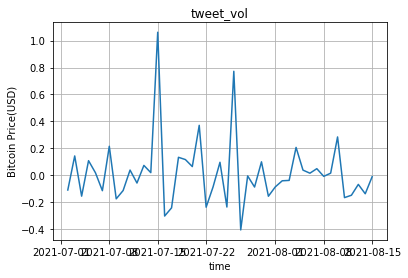


ADF: The data 'tweet_vol' is STATIONARY 

 t-score                -9.221591e+00
p-value                 1.773950e-15
# of lags used          0.000000e+00
# of observations       4.400000e+01
critical value (1%)    -3.588573e+00
critical value (5%)    -2.929886e+00
critical value (10%)   -2.603185e+00
dtype: float64

KPSS: The data 'tweet_vol' is STATIONARY 

 t-score                   0.127056
p-value                   0.085081
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_tweet_len' 

 count    45.000000
mean     -0.001027
std       0.090338
min      -0.249367
25%      -0.016904
50%       0.002373
75%       0.041789
max       0.277624
Name: avg_tweet_len, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


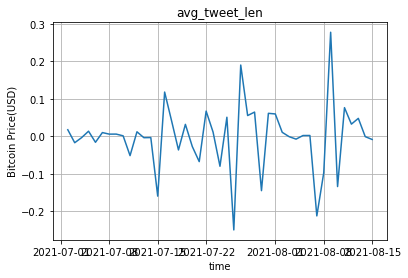


ADF: The data 'avg_tweet_len' is STATIONARY 

 t-score                -6.842191e+00
p-value                 1.779556e-09
# of lags used          1.000000e+00
# of observations       4.300000e+01
critical value (1%)    -3.592504e+00
critical value (5%)    -2.931550e+00
critical value (10%)   -2.604066e+00
dtype: float64

KPSS: The data 'avg_tweet_len' is STATIONARY 

 t-score                   0.141296
p-value                   0.058711
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_followers_cnt' 

 count    45.000000
mean      0.005033
std       0.182195
min      -0.400049
25%      -0.088795
50%      -0.021193
75%       0.096290
max       0.484703
Name: avg_followers_cnt, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


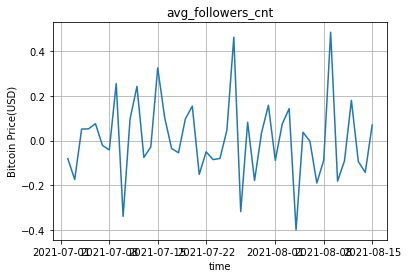

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'avg_followers_cnt' is STATIONARY 

 t-score                -7.842733e+00
p-value                 5.877987e-12
# of lags used          1.000000e+00
# of observations       4.300000e+01
critical value (1%)    -3.592504e+00
critical value (5%)    -2.931550e+00
critical value (10%)   -2.604066e+00
dtype: float64

KPSS: The data 'avg_followers_cnt' is STATIONARY 

 t-score                   0.118555
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Low_prices' 

 count    45.000000
mean      0.007335
std       0.030374
min      -0.042849
25%      -0.014897
50%       0.008860
75%       0.019570
max       0.068037
Name: Low_prices, dtype: float64


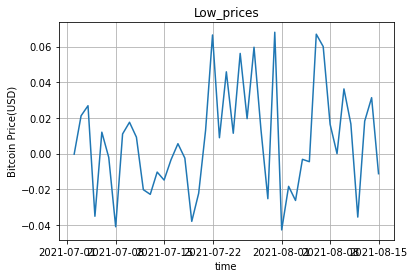

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Low_prices' is STATIONARY 

 t-score                -5.741705e+00
p-value                 6.253734e-07
# of lags used          0.000000e+00
# of observations       4.400000e+01
critical value (1%)    -3.588573e+00
critical value (5%)    -2.929886e+00
critical value (10%)   -2.603185e+00
dtype: float64

KPSS: The data 'Low_prices' is STATIONARY 

 t-score                   0.100503
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'High_prices' 

 count    45.000000
mean      0.007040
std       0.030433
min      -0.050424
25%      -0.009417
50%       0.003250
75%       0.027361
max       0.085602
Name: High_prices, dtype: float64


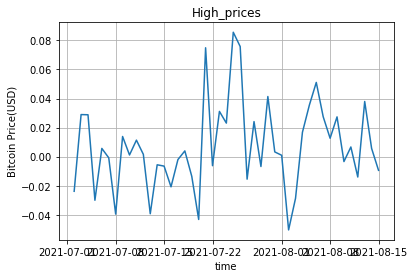


ADF: The data 'High_prices' is STATIONARY 

 t-score                -5.735611e+00
p-value                 6.449034e-07
# of lags used          0.000000e+00
# of observations       4.400000e+01
critical value (1%)    -3.588573e+00
critical value (5%)    -2.929886e+00
critical value (10%)   -2.603185e+00
dtype: float64

KPSS: The data 'High_prices' is STATIONARY 

 t-score                   0.105026
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Open_prices' 

 count    45.000000
mean      0.006819
std       0.032984
min      -0.052122
25%      -0.020259
50%       0.004564
75%       0.026715
max       0.073955
Name: Open_prices, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


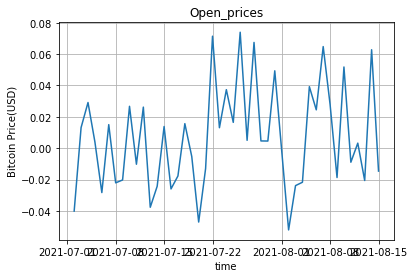

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Open_prices' is STATIONARY 

 t-score                -6.506350e+00
p-value                 1.128660e-08
# of lags used          0.000000e+00
# of observations       4.400000e+01
critical value (1%)    -3.588573e+00
critical value (5%)    -2.929886e+00
critical value (10%)   -2.603185e+00
dtype: float64

KPSS: The data 'Open_prices' is STATIONARY 

 t-score                   0.102111
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Close_prices' 

 count    45.000000
mean      0.007793
std       0.032223
min      -0.052588
25%      -0.018329
50%       0.004323
75%       0.026563
max       0.073812
Name: Close_prices, dtype: float64


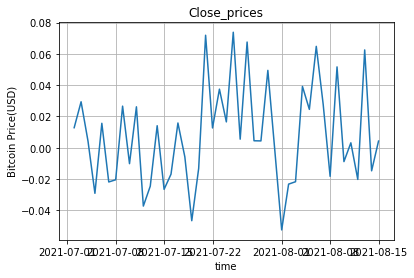

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Close_prices' is STATIONARY 

 t-score                -6.338985e+00
p-value                 2.784852e-08
# of lags used          0.000000e+00
# of observations       4.400000e+01
critical value (1%)    -3.588573e+00
critical value (5%)    -2.929886e+00
critical value (10%)   -2.603185e+00
dtype: float64

KPSS: The data 'Close_prices' is STATIONARY 

 t-score                   0.097796
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Close' 

 count    45.000000
mean      0.000066
std       0.013465
min      -0.037695
25%      -0.005012
50%       0.000000
75%       0.002217
max       0.031119
Name: Close, dtype: float64


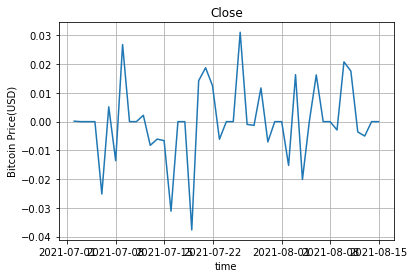

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Close' is STATIONARY 

 t-score                -7.207815e+00
p-value                 2.275855e-10
# of lags used          0.000000e+00
# of observations       4.400000e+01
critical value (1%)    -3.588573e+00
critical value (5%)    -2.929886e+00
critical value (10%)   -2.603185e+00
dtype: float64

KPSS: The data 'Close' is STATIONARY 

 t-score                   0.099003
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Volume_BTC' 

 count    45.000000
mean     -0.004506
std       0.463735
min      -1.053303
25%      -0.389370
50%       0.015037
75%       0.333755
max       1.010124
Name: Volume_BTC, dtype: float64


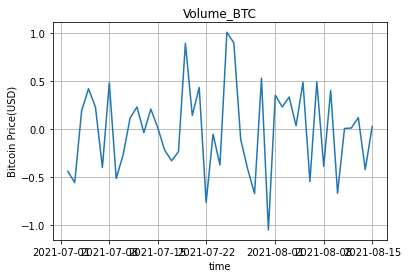

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'Volume_BTC' is STATIONARY 

 t-score                -6.146357e+00
p-value                 7.750176e-08
# of lags used          2.000000e+00
# of observations       4.200000e+01
critical value (1%)    -3.596636e+00
critical value (5%)    -2.933297e+00
critical value (10%)   -2.604991e+00
dtype: float64

KPSS: The data 'Volume_BTC' is STATIONARY 

 t-score                   0.139637
p-value                   0.061783
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_tweet_len' 

 count    45.000000
mean     -0.001027
std       0.090338
min      -0.249367
25%      -0.016904
50%       0.002373
75%       0.041789
max       0.277624
Name: avg_tweet_len, dtype: float64


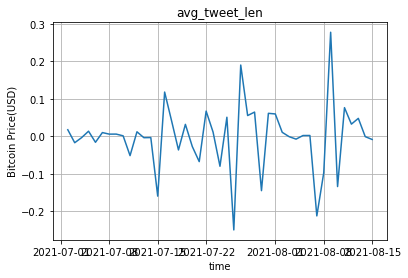


ADF: The data 'avg_tweet_len' is STATIONARY 

 t-score                -6.842191e+00
p-value                 1.779556e-09
# of lags used          1.000000e+00
# of observations       4.300000e+01
critical value (1%)    -3.592504e+00
critical value (5%)    -2.931550e+00
critical value (10%)   -2.604066e+00
dtype: float64

KPSS: The data 'avg_tweet_len' is STATIONARY 

 t-score                   0.141296
p-value                   0.058711
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


,tweet_vol,avg_tweet_len,avg_followers_cnt,Low_prices,High_prices,Open_prices,Close_prices,Close,Volume_BTC
Date,,,,,,,,,
2021-07-02,-0.107724,0.017682,-0.081050,-0.000360,-0.023848,-0.040123,0.012767,0.000157,-0.440557
2021-07-03,0.144737,-0.016904,-0.174170,0.021176,0.028945,0.013158,0.029353,0.000000,-0.559751
2021-07-04,-0.153148,-0.003300,0.051318,0.026821,0.028814,0.029135,0.004198,0.000000,0.190138
2021-07-05,0.109720,0.013801,0.052233,-0.035190,-0.030014,0.003940,-0.029189,0.000000,0.420817
2021-07-06,0.019795,-0.015741,0.075455,0.011974,0.005661,-0.028305,0.015592,-0.025193,0.228947


In [19]:
# ['price'] = log & diff
col_list=[ 
       'tweet_vol','avg_tweet_len','avg_followers_cnt','Low_prices' ,'High_prices','Open_prices',
       'Close_prices', 'Close','Volume_BTC','avg_tweet_len']
for metric_name in df_var_log[col_list]:
    metric = df_var_log[metric_name]
    
    stationary[metric_name] = df_var_log[metric_name].diff().dropna()
# run tests to see if stationary
    series_analysis(stationary,metric_name, xlabel = 'time', ylabel = 'Bitcoin Price(USD)', title = metric_name)

stationary.head()

In [20]:
df_var_log1 = df_var_log[1:]
df_var_log1.shape

(45, 19)

In [21]:
# ['price'] = log & diff
col_list=['avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr', 'avg_cmp_scr',
       'avg_retweet_cnt', 'avg_like_cnt', 
        'Bullish_Ratio', 'Negative_share', 'polarity',
       'pct_change' ]

for metric_name in df_var_log1[col_list]:
    metric = df_var_log1[metric_name]
    
    stationary[metric_name] = df_var_log1[metric_name]
# run tests to see if stationary
    #series_analysis(stationary,metric_name, xlabel = 'time', ylabel = 'Bitcoin Price(USD)', title = metric_name)

stationary.head()

,tweet_vol,avg_tweet_len,avg_followers_cnt,Low_prices,High_prices,Open_prices,Close_prices,Close,Volume_BTC,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,Bullish_Ratio,Negative_share,polarity,pct_change
Date,,,,,,,,,,,,,,,,,,,
2021-07-02,-0.107724,0.017682,-0.081050,-0.000360,-0.023848,-0.040123,0.012767,0.000157,-0.440557,-4.075480,-0.117410,-2.369669,-1.558229,7.840942,0.497537,1.842560,-2.695534,-3.222575,0.012767
2021-07-03,0.144737,-0.016904,-0.174170,0.021176,0.028945,0.013158,0.029353,0.000000,-0.559751,-4.193813,-0.120801,-2.319836,-1.534800,8.663639,0.681388,1.885673,-2.712280,-3.256825,0.029353
2021-07-04,-0.153148,-0.003300,0.051318,0.026821,0.028814,0.029135,0.004198,0.000000,0.190138,-4.243691,-0.135788,-2.187132,-1.355641,8.116703,0.588539,2.132982,-2.809578,-3.215412,0.004198
2021-07-05,0.109720,0.013801,0.052233,-0.035190,-0.030014,0.003940,-0.029189,0.000000,0.420817,-4.111750,-0.139014,-2.183335,-1.349128,7.708522,0.531490,1.958539,-2.648540,-3.147543,-0.029189
2021-07-06,0.019795,-0.015741,0.075455,0.011974,0.005661,-0.028305,0.015592,-0.025193,0.228947,-4.003032,-0.144487,-2.157253,-1.306396,7.648829,0.680252,1.806333,-2.426063,-3.080142,0.015592


In [22]:
stationary.shape

(45, 19)

#### Granger Causality test

In [23]:
def grangers_causality_matrix(data, variables, test='ssr_chi2test', maxlag=2, verbose=True):

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1], 5) for i in range(maxlag)]
            if verbose:
                print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset

df_var_granger = df_var_log1.copy()
granger = grangers_causality_matrix(df_var_granger, variables=df_var_granger.columns)

Y = avg_neg_scr, X = avg_neg_scr, P Values = [1.0, 1.0]
Y = avg_neu_scr, X = avg_neg_scr, P Values = [0.1792, 0.32046]
Y = avg_pos_scr, X = avg_neg_scr, P Values = [0.16821, 0.33302]
Y = avg_cmp_scr, X = avg_neg_scr, P Values = [0.40711, 0.70968]
Y = avg_retweet_cnt, X = avg_neg_scr, P Values = [0.36737, 0.27555]
Y = avg_like_cnt, X = avg_neg_scr, P Values = [0.05005, 0.02804]
Y = tweet_vol, X = avg_neg_scr, P Values = [0.24516, 0.10402]
Y = avg_tweet_len, X = avg_neg_scr, P Values = [0.39947, 0.77025]
Y = avg_followers_cnt, X = avg_neg_scr, P Values = [0.23714, 0.0632]
Y = Bullish_Ratio, X = avg_neg_scr, P Values = [0.24023, 0.25959]
Y = Negative_share, X = avg_neg_scr, P Values = [0.07223, 0.16286]
Y = Open_prices, X = avg_neg_scr, P Values = [0.65605, 0.72189]
Y = High_prices, X = avg_neg_scr, P Values = [0.39636, 0.62818]
Y = Low_prices, X = avg_neg_scr, P Values = [0.06055, 0.12421]
Y = Close_prices, X = avg_neg_scr, P Values = [0.43493, 0.51603]
Y = Volume_BTC, X = avg_neg_scr, P

Y = polarity, X = tweet_vol, P Values = [0.55151, 0.65952]
Y = pct_change, X = tweet_vol, P Values = [0.03144, 0.07571]
Y = Close, X = tweet_vol, P Values = [0.53488, 0.28259]
Y = avg_neg_scr, X = avg_tweet_len, P Values = [0.31071, 0.67005]
Y = avg_neu_scr, X = avg_tweet_len, P Values = [0.71303, 0.84584]
Y = avg_pos_scr, X = avg_tweet_len, P Values = [0.47782, 0.6366]
Y = avg_cmp_scr, X = avg_tweet_len, P Values = [0.53852, 0.70501]
Y = avg_retweet_cnt, X = avg_tweet_len, P Values = [0.77099, 0.12543]
Y = avg_like_cnt, X = avg_tweet_len, P Values = [0.34753, 0.02247]
Y = tweet_vol, X = avg_tweet_len, P Values = [0.33488, 0.7506]
Y = avg_tweet_len, X = avg_tweet_len, P Values = [1.0, 1.0]
Y = avg_followers_cnt, X = avg_tweet_len, P Values = [0.05569, 0.04773]
Y = Bullish_Ratio, X = avg_tweet_len, P Values = [0.75641, 0.56379]
Y = Negative_share, X = avg_tweet_len, P Values = [0.53639, 0.21187]
Y = Open_prices, X = avg_tweet_len, P Values = [0.59965, 0.37076]
Y = High_prices, X = avg_t

Y = avg_neg_scr, X = Close_prices, P Values = [0.09664, 0.09808]
Y = avg_neu_scr, X = Close_prices, P Values = [0.15379, 0.30739]
Y = avg_pos_scr, X = Close_prices, P Values = [0.20052, 0.39911]
Y = avg_cmp_scr, X = Close_prices, P Values = [0.52058, 0.7474]
Y = avg_retweet_cnt, X = Close_prices, P Values = [0.97168, 0.42853]
Y = avg_like_cnt, X = Close_prices, P Values = [0.62762, 0.99745]
Y = tweet_vol, X = Close_prices, P Values = [0.69962, 0.52532]
Y = avg_tweet_len, X = Close_prices, P Values = [0.19205, 0.00461]
Y = avg_followers_cnt, X = Close_prices, P Values = [0.89118, 0.87763]
Y = Bullish_Ratio, X = Close_prices, P Values = [0.13383, 0.0978]
Y = Negative_share, X = Close_prices, P Values = [0.00794, 0.00322]
Y = Open_prices, X = Close_prices, P Values = [0.0, 0.0]
Y = High_prices, X = Close_prices, P Values = [5e-05, 0.00034]
Y = Low_prices, X = Close_prices, P Values = [0.0, 0.0]
Y = Close_prices, X = Close_prices, P Values = [1.0, 1.0]
Y = Volume_BTC, X = Close_prices, P V

In [24]:
granger.to_csv('granger_daily_btc2.csv')

After analysing the results, here are some key observations -

1. Average compund score and other the tweet sentiment scores are not determining the crypto prices, neither there is an opposite casuality
2. However, tweet length, dow jones index and opening prices are determined by the crypto close prices.
3. Tweet volume is determing the prices of crypto which is consistent with correlations observed
4. Close prices are granger caused by tweet volume, average like count and stock prices


#### VAR Model

In [25]:
stationary_model = stationary[['tweet_vol',  'Close_prices',
       'Close', 'avg_tweet_len', 
       'avg_cmp_scr', 'avg_retweet_cnt', 'avg_like_cnt', 'avg_followers_cnt',
       'Bullish_Ratio', 'Negative_share', 'Volume_BTC', 'polarity']]

In [26]:
#split dataset in 70/30
train = stationary_model[ : int(0.7*(len(stationary_model)))].copy()

In [27]:
model = VAR(endog = train)

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [28]:
#maxlags=3
print(model.select_order(trend = 'c'))

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 1, BIC -> 0, FPE -> 1, HQIC -> 1>


In [29]:
model_fit = model.fit(ic = 'aic', trend = 'c')
# number of lags
num_lag = model_fit.k_ar
num_lag

1

In [30]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 29, Aug, 2021
Time:                     10:53:06
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -52.2580
Nobs:                     30.0000    HQIC:                  -57.2133
Log likelihood:           538.346    FPE:                2.88294e-26
AIC:                     -59.5442    Det(Omega_mle):     3.83415e-28
--------------------------------------------------------------------
Results for equation tweet_vol
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        2.636306         2.113584            1.247           0.212
L1.tweet_vol                -0.641519         0.402104           -1.595           0.111
L1.Close_prices             

In [31]:
model_fit.forecast(y = train.values, steps = 1)

array([[ 0.06742388,  0.07396248,  0.01422599, -0.05747529, -1.36615618,
         7.68065963,  0.86856116,  0.02668476,  1.60438055, -2.28797154,
         0.52648763, -2.94742728]])

In [32]:
# create function so that we can iterate model_fit.forecast() over test data
# VAR also has the method 'predict' but it doesn't work so we have to do this the hard way

def predict(data, fitted_model, lag_order, predict_steps):
    # empty list for our predictions
    prediction = []
  
    # for loop to iterate fitted_model over data
    for i in range(lag_order, len(data)):
        # window of lagged data that the model uses to predict next observation
        window = data.iloc[i - lag_order : i].copy()
        # results of fitted_model being applied to window
        results = fitted_model.forecast(y = window.values, steps = predict_steps)
        # append results to prediction list
        prediction.append(results)
        
    # convert prediction (which is a list of numpy arrays) to a dataframe
    df = np.vstack(prediction)
    df = pd.DataFrame(df)
    # df column names from data
    df.columns = list(data.columns)
    # df index from data
    df.index = data.iloc[len(data) - len(prediction) :].index
    
    # return df
    return df

In [33]:
# create error functions

# root mean squared error
def rmse(predicted, actual):
    # formula for rmse
    residual = predicted - actual
    residual_sq = residual ** 2
    mean_sq = np.mean(residual_sq)
    rmse_value = np.sqrt(mean_sq)
    # return rmse_value
    return rmse_value

# mean absolute error
def mae(predicted, actual):
    # formula for mae
    absolute_residual = np.absolute(predicted - actual)
    mae_value = np.mean(absolute_residual)
    # return mae_value
    return mae_value

In [34]:
# function that returns lineplot of predicted vs actual data w/ rmse and mae, and histograph of the residual

def model_graphs(predicted, actual, title = str):
    # RMSE
    rmse_value = rmse(predicted = predicted, actual = actual)
    print(rmse_value)
    # MAE
    mae_value = mae(predicted = predicted, actual = actual)
    # start_year (for putting in text box)
    #start_year = predicted.iloc[ : 1].index.copy()
    # text box in line plot
    text_str = 'RMSE = ' + str(rmse_value) + '\n MAE = ' + str(mae_value)
    print(text_str)
    # line plot
    plt.figure(1)
    plt.plot(actual, color = 'blue', linewidth = 2, label = 'actual')
    plt.plot(predicted, color = 'red', linewidth = 1, label = 'predicted')
    plt.legend()
    plt.title(title + ' Actual vs Predicted')
    #plt.text(x = start_year, y = 0.2, s = text_str)
    # residual & hist
    plt.figure(2)
    residual = actual - predicted
    plt.hist(residual, bins = 200)
    plt.title('Distribution of ' + title + ' residual')
    plt.axvline(residual.mean(), color = 'k', linestyle = 'dashed', linewidth = 1)
    # show graphics
    plt.show()

In [35]:
# function classifies price movement each day as either going up(if positive) or down(negative)
def category(x):
    if x >= 0:
        return 'up'
    elif x < 0:
        return 'down'

# function that returns confusion matrix of model with metrics
def confusion_matrix(predicted, actual, title = str):
    df = pd.DataFrame()
    df['predicted'] = predicted.apply(category)
    df['actual'] = actual.apply(category)
    # code
    df.loc[(df['predicted'] == 'up') & (df['actual'] == 'up'), 'code'] = 'true_positive'
    df.loc[(df['predicted'] == 'up') & (df['actual'] == 'down'), 'code'] = 'false_positive'
    df.loc[(df['predicted'] == 'down') & (df['actual'] == 'down'), 'code'] = 'true_negative'
    df.loc[(df['predicted'] == 'down') & (df['actual'] == 'up'), 'code'] = 'false_negative'
    # confusion dictionary
    z = dict(df['code'].value_counts())
    print(z)
    # confusion metrics
    if "true_positive" not in z:
        z['true_positive'] =0
    elif "false_positive" not in z:
        z['false_positive'] =0
    elif "true_negative" not in z:
        z['true_negative'] =0
    elif "false_negative" not in z:
        z['false_negative'] =0
  
    accuracy = (z['true_positive'] + z['true_negative']) / (z['true_positive'] + z['true_negative'] + z['false_positive'] + z['false_negative'])
    true_positive_rate = z['true_positive'] / (z['true_positive'] + z['false_negative'])
    false_positive_rate = z['false_positive'] / (z['false_positive'] + z['true_negative'])
    true_negative_rate = z['true_negative'] / (z['true_negative'] + z['false_positive'])
    false_negative_rate = z['false_negative'] / (z['false_negative'] + z['true_positive'])
    # print metrics
    print('\nMetrics for [{0}]\nAccuracy:{1:6.3f} \nTP Rate:{2:7.3f} \nFP Rate:{3:7.3f}\nTN Rate:{4:7.3f} \nFN Rate:{5:7.3f}'.format(str(title), accuracy, true_positive_rate, false_positive_rate, true_negative_rate, false_negative_rate))
    # print confusion matrix graph
    print('\n'+
      '            [{title}] Confusion Matrix\n'.format(title = str(title))+
      '\n'+
      '           |-------------|-------------|\n'+
      '  n= {0}  | Predicted:  | Predicted:  |\n'.format(z['true_positive']+z['false_positive']+z['true_negative']+z['false_negative'])+
      '           |    Down     |    Up       |\n'+
      '|----------|-------------|-------------|------------|\n'+
      '| Actual:  |             |             |            |\n'+
      '|  Down    |  tn: {0}    |  fp: {1}    |    {2}     |\n'.format(z['true_negative'], z['false_positive'], z['true_negative']+z['false_positive'])+
      '|----------|-------------|-------------|------------|\n'+
      '| Actual:  |             |             |            |\n'+
      '|   UP     |  fn: {0}    |  tp: {1}    |    {2}    |\n'.format(z['false_negative'], z['true_positive'] ,z['false_negative']+z['true_positive'])+
      '|----------|-------------|-------------|------------|\n'+
      '           |             |             |\n'+
      '           |      {0}    |      {1}   |\n'.format(z['true_negative']+z['false_negative'], z['false_positive']+z['true_positive'])+
      '           |-------------|-------------|\n')
    # return df
    return df

In [36]:
train_predicted = model_fit.fittedvalues.copy()
train_actual = train.iloc[num_lag : len(train)]

0.01996982341475757
RMSE = 0.01996982341475757
 MAE = 0.0168895947692265


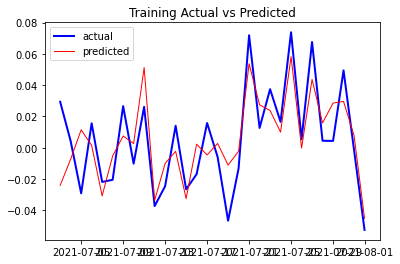

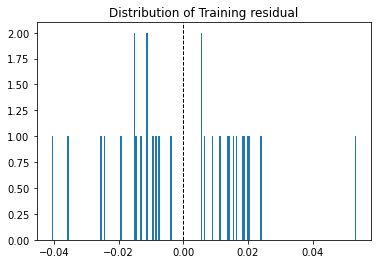

In [37]:
# graphs
model_graphs(predicted = train_predicted['Close_prices'], actual = train_actual['Close_prices'], title = 'Training')

In [38]:
# confusion matrix
train_confusion = confusion_matrix(predicted = train_predicted['Close_prices'], actual = train_actual['Close_prices'], title = 'Train')

{'true_positive': 12, 'true_negative': 8, 'false_negative': 5, 'false_positive': 5}

Metrics for [Train]
Accuracy: 0.667 
TP Rate:  0.706 
FP Rate:  0.385
TN Rate:  0.615 
FN Rate:  0.294

            [Train] Confusion Matrix

           |-------------|-------------|
  n= 30  | Predicted:  | Predicted:  |
           |    Down     |    Up       |
|----------|-------------|-------------|------------|
| Actual:  |             |             |            |
|  Down    |  tn: 8    |  fp: 5    |    13     |
|----------|-------------|-------------|------------|
| Actual:  |             |             |            |
|   UP     |  fn: 5    |  tp: 12    |    17    |
|----------|-------------|-------------|------------|
           |             |             |
           |      13    |      17   |
           |-------------|-------------|



In [39]:
# test results
# test_lag contains the last 'num_lag' number of observations of the training data in order to make the forecast for the first "real" test observation
test_lag = stationary_model.iloc[len(train) - num_lag :]
test_predicted = predict(data = test_lag, fitted_model = model_fit, lag_order = num_lag, predict_steps = 1)
test_actual = stationary_model.iloc[len(train) :]

0.05882131786726752
RMSE = 0.05882131786726752
 MAE = 0.046721728856092985


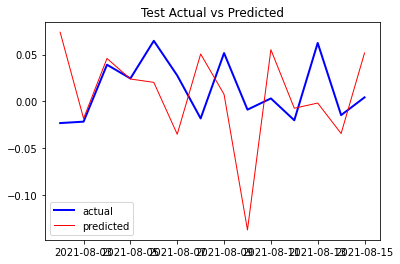

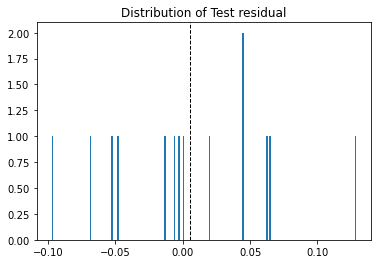

In [40]:
# graphs
model_graphs(predicted = test_predicted['Close_prices'], actual = test_actual['Close_prices'], title = 'Test')

In [41]:
# confusion matrix
test_confusion = confusion_matrix(predicted = test_predicted['Close_prices'], actual = test_actual['Close_prices'], title = 'Test')

{'true_positive': 6, 'true_negative': 4, 'false_negative': 2, 'false_positive': 2}

Metrics for [Test]
Accuracy: 0.714 
TP Rate:  0.750 
FP Rate:  0.333
TN Rate:  0.667 
FN Rate:  0.250

            [Test] Confusion Matrix

           |-------------|-------------|
  n= 14  | Predicted:  | Predicted:  |
           |    Down     |    Up       |
|----------|-------------|-------------|------------|
| Actual:  |             |             |            |
|  Down    |  tn: 4    |  fp: 2    |    6     |
|----------|-------------|-------------|------------|
| Actual:  |             |             |            |
|   UP     |  fn: 2    |  tp: 6    |    8    |
|----------|-------------|-------------|------------|
           |             |             |
           |      6    |      8   |
           |-------------|-------------|



**Model gives us 71% accuracy on test dataset**

Code Reference - https://github.com/pcann9/Predict_Bitcoin_Using_Reddit_Sentiment/blob/master/7_stationary_transformation.ipynb